# Forward Thinking + Tricks
##### Sean Wade

In [15]:
from forwardThinking.datasets import load_mnist
from forwardThinking.models import PassForwardThinking, ForwardThinking, DNN, AdaptiveForwardThinking
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.display import HTML
import urllib2
HTML(open("./jupyter.css", "r").read())

In [2]:
%load_ext autoreload
%autoreload 2

### Helper Functions

In [3]:
def plot_acc_loss(acc, loss, val_acc=None, val_loss=None):
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    plt.title('Accuracy')
    plt.plot(acc)
    if val_acc != None:
        plt.plot(val_acc)
    plt.subplot(122)
    plt.title('Loss')
    plt.plot(loss)
    if val_loss != None:
        plt.plot(val_loss)
    plt.tight_layout()
    plt.show()

In [13]:
def plot_all(model_list):
    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.title('Train Accuracy')
    plt.subplot(222)
    plt.title('Test Accuracy')
    plt.subplot(223)
    plt.title('Train Loss')
    plt.subplot(224)
    plt.title('Test Loss')
    
    color = plt.cm.viridis_r(np.linspace(0,1,len(model_list)))
    for x, c in zip(model_list, color):
        name, acc, loss, val_acc, val_loss = x
        plt.subplot(221)
        plt.plot(acc, label=name, c=c)
        
        plt.subplot(222)
        plt.plot(val_acc, label=name, c=c)
        
        plt.subplot(223)
        plt.plot(loss, label=name, c=c)
        
        plt.subplot(224)
        plt.plot(val_loss, label=name, c=c)
    
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('/home/seanwade/Desktop/comarison.png')
    plt.show()


        
        
def make_tuple(name, acc, loss, val_acc=None, val_loss=None):
    return (name, acc, loss, val_acc, val_loss)

In [4]:
def model_summary(model):
    print "Model Name: %s" % model.summary['model_name']
    print "Model Version: %-20s" % model.summary['model_version']
    print "Training Time: %s" % model.summary['training_time']
    print "Training Acc: %s" % model.summary['accuracy'][-1]
    print "Testing Acc: %s" % model.summary['val_accuracy'][-1]

In [5]:
# Load the data
x_train, y_train, x_test, y_test = load_mnist()

# Dropout

## Pass-Forward

### With Dropout

In [17]:
passForwardDrop = PassForwardThinking([784, 100, 50, 10], freeze=False)
passForwardDrop.fit(x_train, y_train, x_test, y_test, epochs= 10, dropout=True, verbose=False)

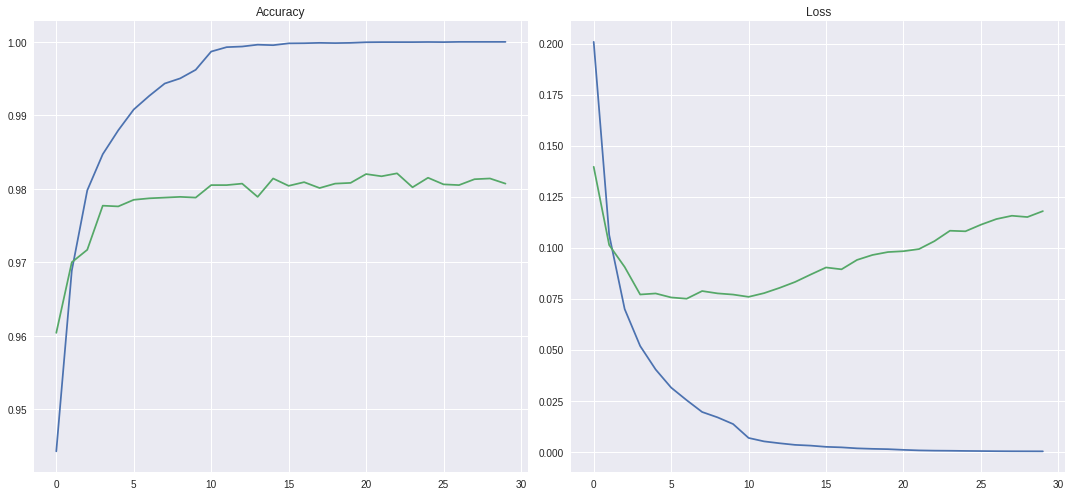

In [18]:
plot_acc_loss(passForwardDrop.summary['accuracy'], passForwardDrop.summary['loss'],
             passForwardDrop.summary['val_accuracy'], passForwardDrop.summary['val_loss'])

In [19]:
model_summary(passForwardDrop)

Model Name: PassForwardThinking
Model Version: 1.1                 
Training Time: 96.7931838036
Training Acc: 0.999983333333
Testing Acc: 0.9807


### WIthout Dropout

In [20]:
passForward = PassForwardThinking([784, 100, 50, 10], freeze=False)
passForward.fit(x_train, y_train, x_test, y_test, epochs= 10, dropout=False, verbose=False)

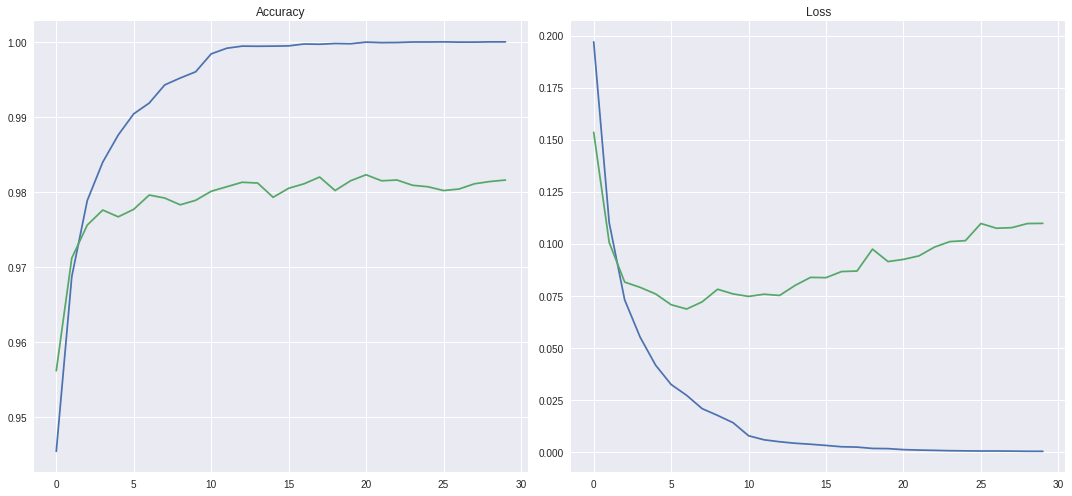

In [21]:
plot_acc_loss(passForward.summary['accuracy'], passForward.summary['loss'],
             passForward.summary['val_accuracy'], passForward.summary['val_loss'])

In [22]:
model_summary(passForward)

Model Name: PassForwardThinking
Model Version: 1.1                 
Training Time: 97.4332170486
Training Acc: 1.0
Testing Acc: 0.9816


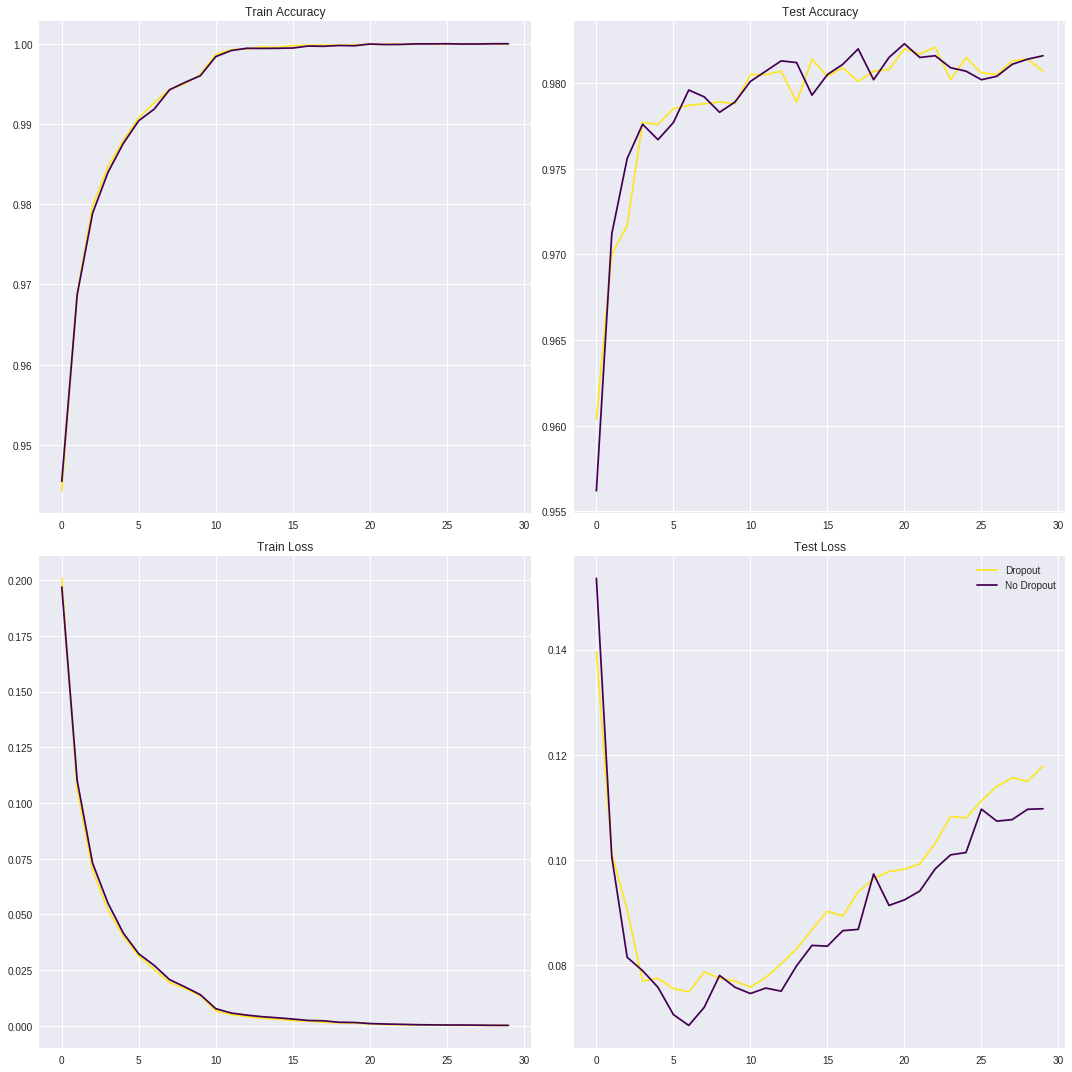

In [23]:
plot_list = []
plot_list.append(make_tuple('Dropout', passForwardDrop.summary['accuracy'], passForwardDrop.summary['loss'],
             passForwardDrop.summary['val_accuracy'], passForwardDrop.summary['val_loss']))
plot_list.append(make_tuple('No Dropout', passForward.summary['accuracy'], passForward.summary['loss'],
             passForward.summary['val_accuracy'], passForward.summary['val_loss']))

plot_all(plot_list)

## Pass-Forward Weight Freezing

### With Dropout
Train layerwise like before, however freeze the connections of old weights once learned.

In [23]:
passForwardFreeze = PassForwardThinking([784, 100, 50, 10], freeze=True)
passForwardFreeze.fit(x_train, y_train, x_test, y_test, epochs=10, dropout=True, verbose=False)

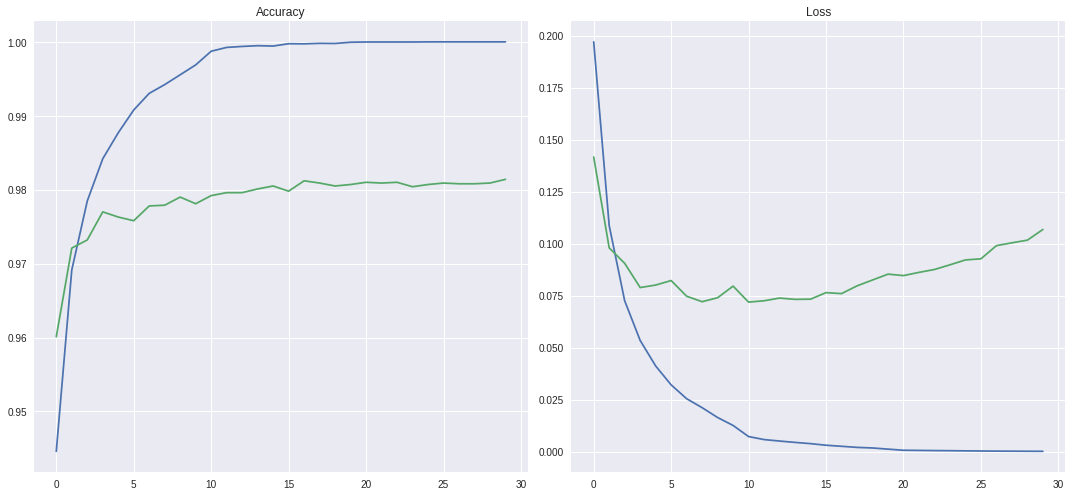

In [24]:
plot_acc_loss(passForwardFreeze.summary['accuracy'], passForwardFreeze.summary['loss'],
             passForwardFreeze.summary['val_accuracy'], passForwardFreeze.summary['val_loss'])

In [25]:
model_summary(passForwardFreeze)

Model Name: PassForwardThinking
Model Version: 1.1                 
Training Time: 97.2523598671
Training Acc: 1.0
Testing Acc: 0.9814


### Without Dropout

In [ ]:
passForwardFreeze = PassForwardThinking([784, 100, 50, 10], freeze=True)
passForwardFreeze.fit(x_train, y_train, x_test, y_test, epochs=10, verbose=False)

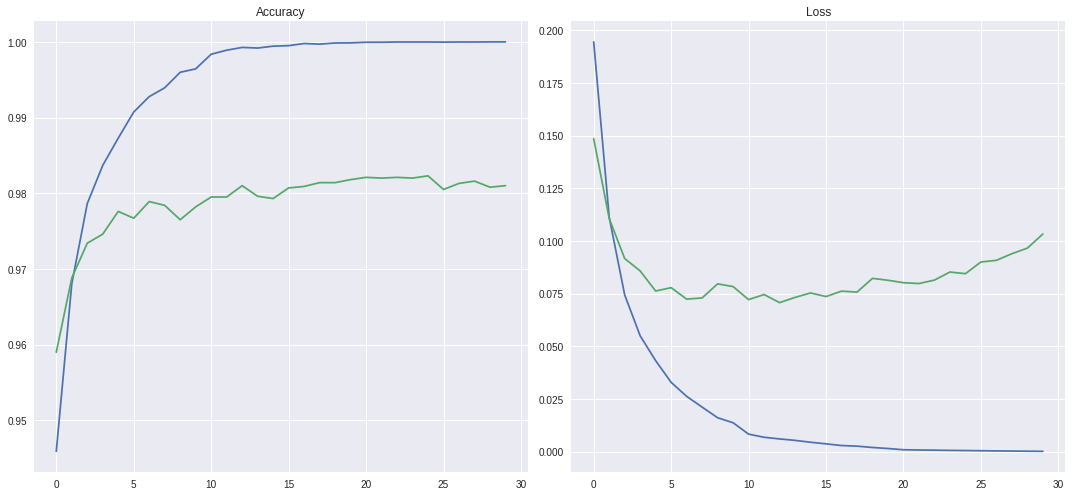

In [98]:
plot_acc_loss(passForwardFreeze.summary['accuracy'], passForwardFreeze.summary['loss'],
             passForwardFreeze.summary['val_accuracy'], passForwardFreeze.summary['val_loss'])

In [99]:
model_summary(passForwardFreeze)

Model Name: PassForwardThinking
Model Version: 1.0                 
Training Time: 115.369642019
Training Acc: 1.0
Testing Acc: 0.981


# L1

## Pass-Forward

In [28]:
passForward = PassForwardThinking([784, 100, 50, 10], freeze=False)
passForward.fit(x_train, y_train, x_test, y_test, epochs= 10, reg_type='l2', reg=.001, dropout=True, verbose=False)

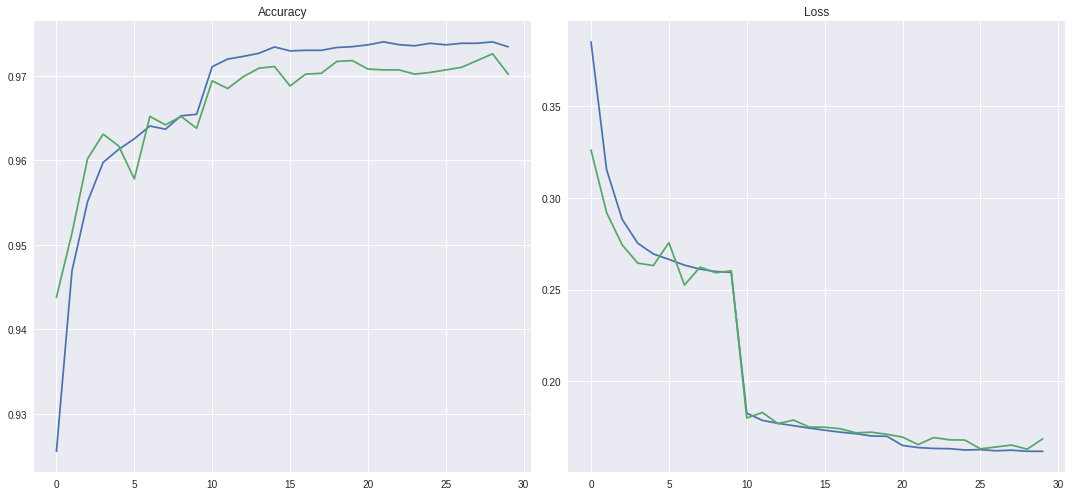

In [29]:
plot_acc_loss(passForward.summary['accuracy'], passForward.summary['loss'],
             passForward.summary['val_accuracy'], passForward.summary['val_loss'])